# Quickhull

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def cross_product(o, a, b):
    """
    Compute the cross product of  position of B compared to OA.
    Returns True if OA and OB form a positive angle
    
    Parameters 
    ----------
    o : pd.Series
        Coordinates ('x', 'y') of point in hull
    a : pd.Series
        Coordinates('x', 'y') of current end_point
    b : pd.Pandas
        Tuple ('x', 'y') of considered point
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

In [4]:
def distance_from_line(p1, p2, p):
    """
    Compute distance of p from line passing through p1 and p2
    
    Parameters
    ----------
    p1 : pd.Series
        Coordinates ('x', 'y') of one point on the line
    p2 : pd.Series
        Coordinates ('x', 'y') of one point on the line
    p : pd.Series
        Coordinates ('x', 'y') of the point we want to \ 
        calculate the distance from the line
    """
    return np.abs((p2.y - p1.y) * p.x 
            - (p2.x - p1.x) * p.y 
            + p2.x * p1.y 
            - p2.y * p1.x) / np.sqrt((p2.y - p1.y)**2 + (p2.x - p1.x)**2)

In [5]:
def findhull(points, P, Q):
    """
    Parameters
    ----------
    points : pd.DataFrame
        Points in subset
    P : pd.Series
        Coordinates('x', 'y') of one point \
        used to split data
    Q : pd.Series
        Coordinates('x', 'y') of one point \
        used to split data
    """
    # if length is one or zero, no need to calculate further
    if len(points) <= 1:
        return points
    
    # computing distance from line passing through P and Q
    points.loc[:,'distance_from_line'] = points.apply(lambda p: distance_from_line(P, Q, p), axis=1)
    farthest_point = points.loc[points.distance_from_line.idxmax()]
    
    # Splitting data based on relative position with P, Q and the farthest point from PQ
    S1 = points[points.apply(lambda p : cross_product(P, farthest_point, p), axis=1) > 0]
    S2 = points[points.apply(lambda p : cross_product(farthest_point, Q, p) > 0, axis=1)]
    
    # Convex hull of set of points using recursion and splitted data
    convex_hull = pd.DataFrame(columns=points.columns)
    convex_hull = convex_hull.append(farthest_point)
    convex_hull = pd.concat([
        findhull(S1, P, farthest_point), 
        convex_hull, 
        findhull(S2, farthest_point, Q)])
    
    return convex_hull

In [6]:
def quickhull(points):
    """
    Computes convex hull of a given set of points
    
    Parameters
    ----------
    points : pd.DataFrame
        DataFrame with x and y coordinates for all points to consider
    """
    # initial points on hull    
    A = points.loc[points.x.idxmin()]
    B = points.loc[points.x.idxmax()]
    convex_hull = pd.DataFrame(columns=points.columns)
    
    # splitting set of points
    points['cross_product'] = points.apply(lambda p : cross_product(A, B, p), axis=1)
    S1 = points[points['cross_product'] > 0]
    S2 = points[points['cross_product'] < 0]
    
    # Recursion for finding points on hull
    convex_hull = convex_hull.append(A)
    convex_hull = pd.concat([convex_hull, findhull(S1, A, B)], sort=True)
    convex_hull = convex_hull.append(B)
    convex_hull = pd.concat([convex_hull, findhull(S2, B, A)], sort=True)
    convex_hull = convex_hull.append(A)
    
    # plotting results
    plt.figure(figsize=(10,6))
    plt.scatter(data=points, x='x', y='y', color='white', linewidth=1, edgecolors='black', label='Inner points')
    plt.scatter(data=convex_hull, x='x', y='y', s=50, color='black', label='Convex hull points')
    plt.plot(convex_hull.x, convex_hull.y, color='black', label='Convex hull')
    plt.legend()
    plt.show()

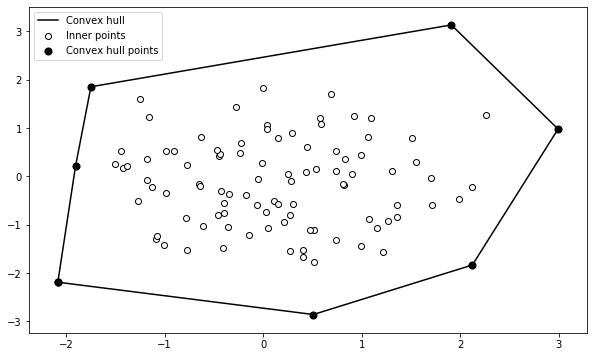

In [8]:
points = pd.DataFrame(np.random.normal(size=(100, 2)), columns=['x', 'y'])
quickhull(points)